# Corelation and defining Income_Class and Crime_class

In [124]:
# Import the packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

from datetime import datetime
import pytz

import os
import json
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pylab as plt
import geopandas as gpd
%pip install folium
import folium
from shapely.geometry import Point
from shapely import wkt

# Configure Notebook
#for plots to be inline
%matplotlib inline 
#for auto_complete 
%config Completer.use_jedi = False 

# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

Note: you may need to restart the kernel to use updated packages.


#### The final dataframe shall be used to form the classes and understand the importance of features aswell as create new features and see the relavance.

In [125]:
#Final _data frame file
df_1 = pd.read_csv('housing_tor_clean_with_best_buffers_v2.csv')
df_1.head(2)
df_1.drop(columns=df_1.columns[1], inplace=True)

df_1

neighbourhood              street address   latitude  \
0                  agincourt north      435 middlefield rd #56  43.808839   
1                  agincourt north              78 ashridge dr  43.815736   
2                  agincourt north            48 ardgowan cres  43.812243   
3                  agincourt north      119 - 5235 finch ave e  43.809932   
4     agincourt south malvern west           60 manorglen cres  43.780125   
...                            ...                         ...        ...   
1128            yorkdale glen park            1 bolingbroke rd  43.712749   
1129            yorkdale glen park               354 ranee ave  43.722078   
1130            yorkdale glen park                 61 dane ave  43.717200   
1131            yorkdale glen park           374 hillmount ave  43.706844   
1132            yorkdale glen park  511 - 10 old york mills rd  43.725707   

      longitude                      geometry    price  bedrooms  bathrooms  \
0    -79.256579  point (-79.256579 43.808839)   848800         4          4   
1    -79.268628  point (-79.268628 43.815736)   998000         5          3   
2    -79.271403  point (-79.271403 43.812243)   898000         4          3   
3    -79.254877  point (-79.254877 43.809932)   560000         3          2   
4    -79.271026  point (-79.271026 43.780125)  1199000         4          3   
...         ...                           ...      ...       ...        ...   
1128 -79.448179  point (-79.448179 43.712749)  1625000         3          3   
1129 -79.455298  point (-79.455298 43.722078)  2688000         5          5   
1130 -79.449548    point (-79.449548 43.7172)  3299000         9          5   
1131 -79.450609  point (-79.450609 43.706844)  1800000         9          4   
1132 -79.458162  point (-79.458162 43.725707)   979900         2          1   

      total_crimes (2020-2024)  average_total_crime (per_year)  ...  \
0                         1285                             257  ...   
1                         1285                             257  ...   
2                         1285                             257  ...   
3                         1285                             257  ...   
4                         1806                             361  ...   
...                        ...                             ...  ...   
1128                      2841                             568  ...   
1129                      2841                             568  ...   
1130                      2841                             568  ...   
1131                      2841                             568  ...   
1132                      2841                             568  ...   

      bus stop_best_buffer_area_1.5_values  pub_best_buffer_area_0.5_values  \
0                                       45                                0   
1                                       76                                0   
2                                       67                                0   
3                                       50                                0   
4                                       64                                0   
...                                    ...                              ...   
1128                                   127                                0   
1129                                   106                                0   
1130                                   120                                0   
1131                                   102                                0   
1132                                    93                                0   

      restaurant_best_buffer_area_1.5_values  \
0                                          7   
1                                          7   
2                                          7   
3                                          5   
4                                         22   
...                                      ...   
1128     

#### The above dataframe has all the features, in this code file we shall be focusing on defining and corelating the crime and Income of individuals for the various Neighbourhoods to identify if they affect the price eventually.

### We shall categorise the crime and income data to classify the neighbourhoods as 
~ in terms of crime class:
1) Severe Crime area
2) moderate Crime area
3) Minor crime area

~ in terms of Income class:
1) High class area
2) middle class area
3) Low class area

## Crime and Income percentages

Defining the crime severity %age  as the ratio between the crime and total crimes reported in each neighbourhood.

One thing we did consider was the severity index of crimes, and hence weights were goven to the crimes while considering each class.

In [126]:
# crime=df_1.iloc[:,8:16]
# crime['%severe_crime']= df_1['total_severe_crimes (2020-2024)']*100/df_1['total_crimes (2020-2024)']
# crime['%moderate_crime']= df_1['total_moderate_crimes (2020-2024)']*100/df_1['total_crimes (2020-2024)']
# crime['%minor_crime']= df_1['total_minor_crimes (2020-2024)']*100/df_1['total_crimes (2020-2024)']
# j=df_1['neighbourhood']
# crime=pd.concat([j,crime],axis=1)
# crime.head()



In [127]:
#if we assign weights to crime.

crime=df_1.iloc[:,8:16]

crime['total']= df_1['total_severe_crimes (2020-2024)']*100 + df_1['total_moderate_crimes (2020-2024)']*1.5 + df_1['total_minor_crimes (2020-2024)']
crime['%severe_crime']= df_1['total_severe_crimes (2020-2024)']*100*100/crime['total']
crime['%moderate_crime']= df_1['total_moderate_crimes (2020-2024)']*100/crime['total']*1.5
crime['%minor_crime']= df_1['total_minor_crimes (2020-2024)']*100/crime['total']
j=df_1['neighbourhood']
crime=pd.concat([j,crime],axis=1)
crime.drop('total', axis=1, inplace=True)
crime.head()



neighbourhood  total_crimes (2020-2024)  \
0               agincourt north                      1285   
1               agincourt north                      1285   
2               agincourt north                      1285   
3               agincourt north                      1285   
4  agincourt south malvern west                      1806   

   average_total_crime (per_year)  total_severe_crimes (2020-2024)  \
0                             257                                7   
1                             257                                7   
2                             257                                7   
3                             257                                7   
4                             361                               18   

   average_severe_crimes (per_year)  total_moderate_crimes (2020-2024)  \
0                                 1                                487   
1                                 1                                487   
2                                 1                                487   
3                                 1                                487   
4                                 4                                930   

   average_moderate_crimes (per_year)  total_minor_crimes (2020-2024)  \
0                                  97                             791   
1                                  97                             791   
2                                  97                             791   
3                                  97                             791   
4                                 186                             858   

   average_minor_crimes (per_year)  %severe_crime  %moderate_crime  \
0                              158      31.510241        32.883187   
1                              158      31.510241        32.883187   
2                              158      31.510241        32.883187   
3                              158      31.510241        32.883187   
4                              172      44.411547        34.418949   

   %minor_crime  
0     35.606572  
1     35.606572  
2     35.606572  
3     35.606572  
4     21.169504

In [128]:
#Income %age distriburion

income=df_1.iloc[:,16:22]
income['Total_pop']= df_1.iloc[:, 16:22].sum(axis=1) 
income['%high_class']= income.iloc[:,4:6].sum(axis=1)*100/income['Total_pop']
income['%middle_class']= income.iloc[:,2:4].sum(axis=1)*100/income['Total_pop']
income['%low_class']= income.iloc[:,0:2].sum(axis=1)*100/income['Total_pop']

j=df_1['neighbourhood'] #get the name of neighbourhoods

income=pd.concat([j,income],axis=1)
income


neighbourhood  class 6g  class 5g  class 4g  class 3g  \
0                  agincourt north      9005      7485      1960      2020   
1                  agincourt north      9005      7485      1960      2020   
2                  agincourt north      9005      7485      1960      2020   
3                  agincourt north      9005      7485      1960      2020   
4     agincourt south malvern west      7035      6535      2085      2160   
...                            ...       ...       ...       ...       ...   
1128            yorkdale glen park      4620      4375      1645      2080   
1129            yorkdale glen park      4620      4375      1645      2080   
1130            yorkdale glen park      4620      4375      1645      2080   
1131            yorkdale glen park      4620      4375      1645      2080   
1132            yorkdale glen park      4620      4375      1645      2080   

      class 2g  class 1g  Total_pop  %high_class  %middle_class  %low_class  
0          780       175      21425     4.457410      18.576429   76.966161  
1          780       175      21425     4.457410      18.576429   76.966161  
2          780       175      21425     4.457410      18.576429   76.966161  
3          780       175      21425     4.457410      18.576429   76.966161  
4          800       270      18885     5.665872      22.478157   71.855970  
...        ...       ...        ...          ...            ...         ...  
1128       880       270      13870     8.291276      26.856525   64.852199  
1129       880       270      13870     8.291276      26.856525   64.852199  
1130       880       270      13870     8.291276      26.856525   64.852199  
1131       880       270      13870     8.291276      26.856525   64.852199  
1132       880       270      13870     8.291276      26.856525   64.852199  

[1133 rows x 11 columns]

### Understsnding the effect of the new classes on each other 

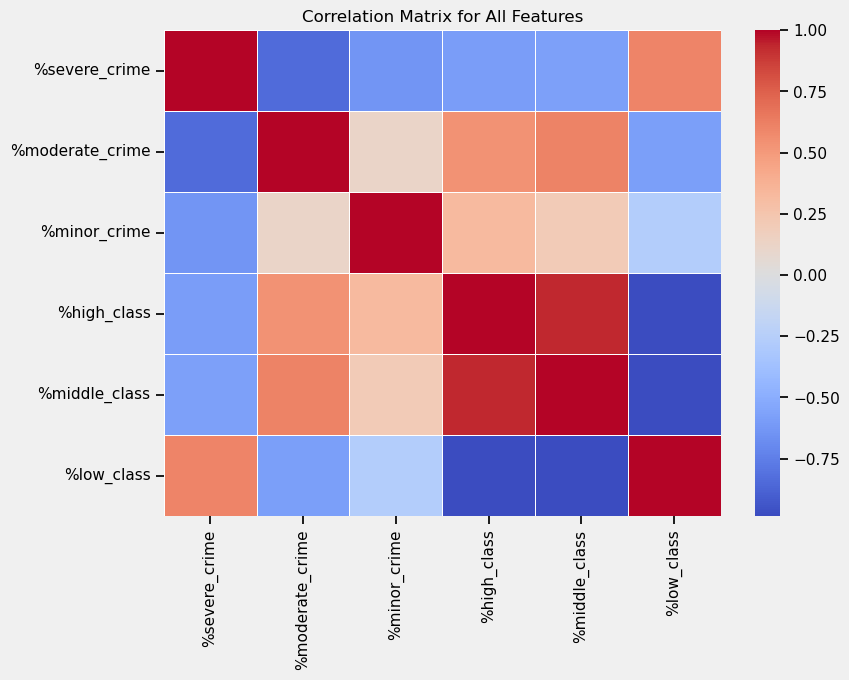

In [129]:
# Combine numerical and encoded categorical features
m=crime.iloc[:,9:12]
n=income.iloc[:,8:11]
combined_df = pd.concat([m, n], axis=1)
combined_df
# Compute the correlation matrix
full_correlation_matrix = combined_df.corr()
df=pd.DataFrame(full_correlation_matrix)
# Print the full correlation matrix
(full_correlation_matrix)

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))  # Adjust size as needed
sns.heatmap(full_correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix for All Features')
plt.show()


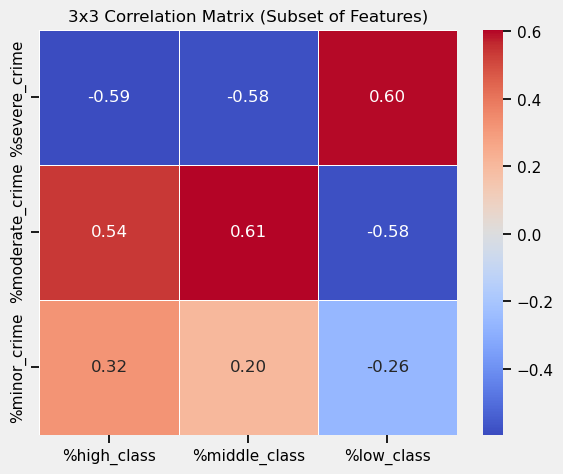

%severe_crime  %moderate_crime  %minor_crime  %high_class  \
0         31.510241        32.883187     35.606572     4.457410   
1         31.510241        32.883187     35.606572     4.457410   
2         31.510241        32.883187     35.606572     4.457410   
3         31.510241        32.883187     35.606572     4.457410   
4         44.411547        34.418949     21.169504     5.665872   
...             ...              ...           ...          ...   
1128      55.865922        23.346758     20.787320     8.291276   
1129      55.865922        23.346758     20.787320     8.291276   
1130      55.865922        23.346758     20.787320     8.291276   
1131      55.865922        23.346758     20.787320     8.291276   
1132      55.865922        23.346758     20.787320     8.291276   

      %middle_class  %low_class  
0         18.576429   76.966161  
1         18.576429   76.966161  
2         18.576429   76.966161  
3         18.576429   76.966161  
4         22.478157   71.855970  
...             ...         ...  
1128      26.856525   64.852199  
1129      26.856525   64.852199  
1130      26.856525   64.852199  
1131      26.856525   64.852199  
1132      26.856525   64.852199  

[1133 rows x 6 columns]

In [130]:
#Combine the selected columns
combined_df = pd.concat([m, n], axis=1)

# Compute the 3x3 correlation matrix
small_correlation_matrix = combined_df.corr().iloc[:3, 3:]

# Plot the 3x3 correlation heatmap
plt.figure(figsize=(6, 5))  # Adjust size as needed
sns.heatmap(small_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('3x3 Correlation Matrix (Subset of Features)')
plt.show()
combined_df

#### this is a good corelation as we can see  moderate crimes are more related to high and middle income class and severe for low income class.

### Defining the 9 categorical classes based on %age contibution

In [131]:
### dCombining the sets
final_df=pd.concat([j,combined_df],axis=1)
final_df

neighbourhood  %severe_crime  %moderate_crime  \
0                  agincourt north      31.510241        32.883187   
1                  agincourt north      31.510241        32.883187   
2                  agincourt north      31.510241        32.883187   
3                  agincourt north      31.510241        32.883187   
4     agincourt south malvern west      44.411547        34.418949   
...                            ...            ...              ...   
1128            yorkdale glen park      55.865922        23.346758   
1129            yorkdale glen park      55.865922        23.346758   
1130            yorkdale glen park      55.865922        23.346758   
1131            yorkdale glen park      55.865922        23.346758   
1132            yorkdale glen park      55.865922        23.346758   

      %minor_crime  %high_class  %middle_class  %low_class  
0        35.606572     4.457410      18.576429   76.966161  
1        35.606572     4.457410      18.576429   76.966161  
2        35.606572     4.457410      18.576429   76.966161  
3        35.606572     4.457410      18.576429   76.966161  
4        21.169504     5.665872      22.478157   71.855970  
...            ...          ...            ...         ...  
1128     20.787320     8.291276      26.856525   64.852199  
1129     20.787320     8.291276      26.856525   64.852199  
1130     20.787320     8.291276      26.856525   64.852199  
1131     20.787320     8.291276      26.856525   64.852199  
1132     20.787320     8.291276      26.856525   64.852199  

[1133 rows x 7 columns]

In [132]:
##Class assignment

# Initialize new columns with default values
final_df['Income_Class'] = None
final_df['Crime_Class'] = None

# Iterate over rows to apply the logic
for index, row in income.iterrows():
    # Calculate column1 + column2
    total = row['%high_class'] + row['%middle_class']
    high = row['%high_class'] 
    # Assign the Class based on total of column1 and column2
    if total >=35: 
        if high >20:
            final_df.at[index, 'Income_Class'] = 'High Class'
        else:
            final_df.at[index, 'Income_Class'] = 'Moderate Class'
    else:
        final_df.at[index, 'Income_Class'] = 'Low Class'

    # Now check crime-related conditions and assign crime class
    if final_df.iloc[index, 1] >= 50.0:  # Example crime condition
        final_df.at[index, 'Crime_Class'] = 'Severe Crime'
    elif final_df.iloc[index, 2] <=40:  # 30 for weighted, 40 without weight
        final_df.at[index, 'Crime_Class'] = 'Minor Crime'
    else:
        final_df.at[index, 'Crime_Class'] = 'Moderate Crime'

# Print the updated DataFrame
final_df.iloc[:,2].mode()


0    47.99281
Name: %moderate_crime, dtype: float64

In [133]:
final_df['Crime_Class'].unique()

array(['Minor Crime', 'Moderate Crime', 'Severe Crime'], dtype=object)

In [134]:
final_df

neighbourhood  %severe_crime  %moderate_crime  \
0                  agincourt north      31.510241        32.883187   
1                  agincourt north      31.510241        32.883187   
2                  agincourt north      31.510241        32.883187   
3                  agincourt north      31.510241        32.883187   
4     agincourt south malvern west      44.411547        34.418949   
...                            ...            ...              ...   
1128            yorkdale glen park      55.865922        23.346758   
1129            yorkdale glen park      55.865922        23.346758   
1130            yorkdale glen park      55.865922        23.346758   
1131            yorkdale glen park      55.865922        23.346758   
1132            yorkdale glen park      55.865922        23.346758   

      %minor_crime  %high_class  %middle_class  %low_class    Income_Class  \
0        35.606572     4.457410      18.576429   76.966161       Low Class   
1        35.606572     4.457410      18.576429   76.966161       Low Class   
2        35.606572     4.457410      18.576429   76.966161       Low Class   
3        35.606572     4.457410      18.576429   76.966161       Low Class   
4        21.169504     5.665872      22.478157   71.855970       Low Class   
...            ...          ...            ...         ...             ...   
1128     20.787320     8.291276      26.856525   64.852199  Moderate Class   
1129     20.787320     8.291276      26.856525   64.852199  Moderate Class   
1130     20.787320     8.291276      26.856525   64.852199  Moderate Class   
1131     20.787320     8.291276      26.856525   64.852199  Moderate Class   
1132     20.787320     8.291276      26.856525   64.852199  Moderate Class   

       Crime_Class  
0      Minor Crime  
1      Minor Crime  
2      Minor Crime  
3      Minor Crime  
4      Minor Crime  
...            ...  
1128  Severe Crime  
1129  Severe Crime  
1130  Severe Crime  
1131  Severe Crime  
1132  Severe Crime  

[1133 rows x 9 columns]

In [135]:
main_df = pd.concat([df_1[['street address', 'latitude', 'longitude']], 
                     final_df[['neighbourhood', 'Income_Class', 'Crime_Class']]], axis=1)
main_df


street address   latitude  longitude  \
0         435 middlefield rd #56  43.808839 -79.256579   
1                 78 ashridge dr  43.815736 -79.268628   
2               48 ardgowan cres  43.812243 -79.271403   
3         119 - 5235 finch ave e  43.809932 -79.254877   
4              60 manorglen cres  43.780125 -79.271026   
...                          ...        ...        ...   
1128            1 bolingbroke rd  43.712749 -79.448179   
1129               354 ranee ave  43.722078 -79.455298   
1130                 61 dane ave  43.717200 -79.449548   
1131           374 hillmount ave  43.706844 -79.450609   
1132  511 - 10 old york mills rd  43.725707 -79.458162   

                     neighbourhood    Income_Class   Crime_Class  
0                  agincourt north       Low Class   Minor Crime  
1                  agincourt north       Low Class   Minor Crime  
2                  agincourt north       Low Class   Minor Crime  
3                  agincourt north       Low Class   Minor Crime  
4     agincourt south malvern west       Low Class   Minor Crime  
...                            ...             ...           ...  
1128            yorkdale glen park  Moderate Class  Severe Crime  
1129            yorkdale glen park  Moderate Class  Severe Crime  
1130            yorkdale glen park  Moderate Class  Severe Crime  
1131            yorkdale glen park  Moderate Class  Severe Crime  
1132            yorkdale glen park  Moderate Class  Severe Crime  

[1133 rows x 6 columns]

In [136]:
main_df.to_csv('Income_Crime_df_classes_neigh_Tor.csv', index=True)


### Saving the crime and Income class for further classification -clustering and price prediction model.

## Visualisation

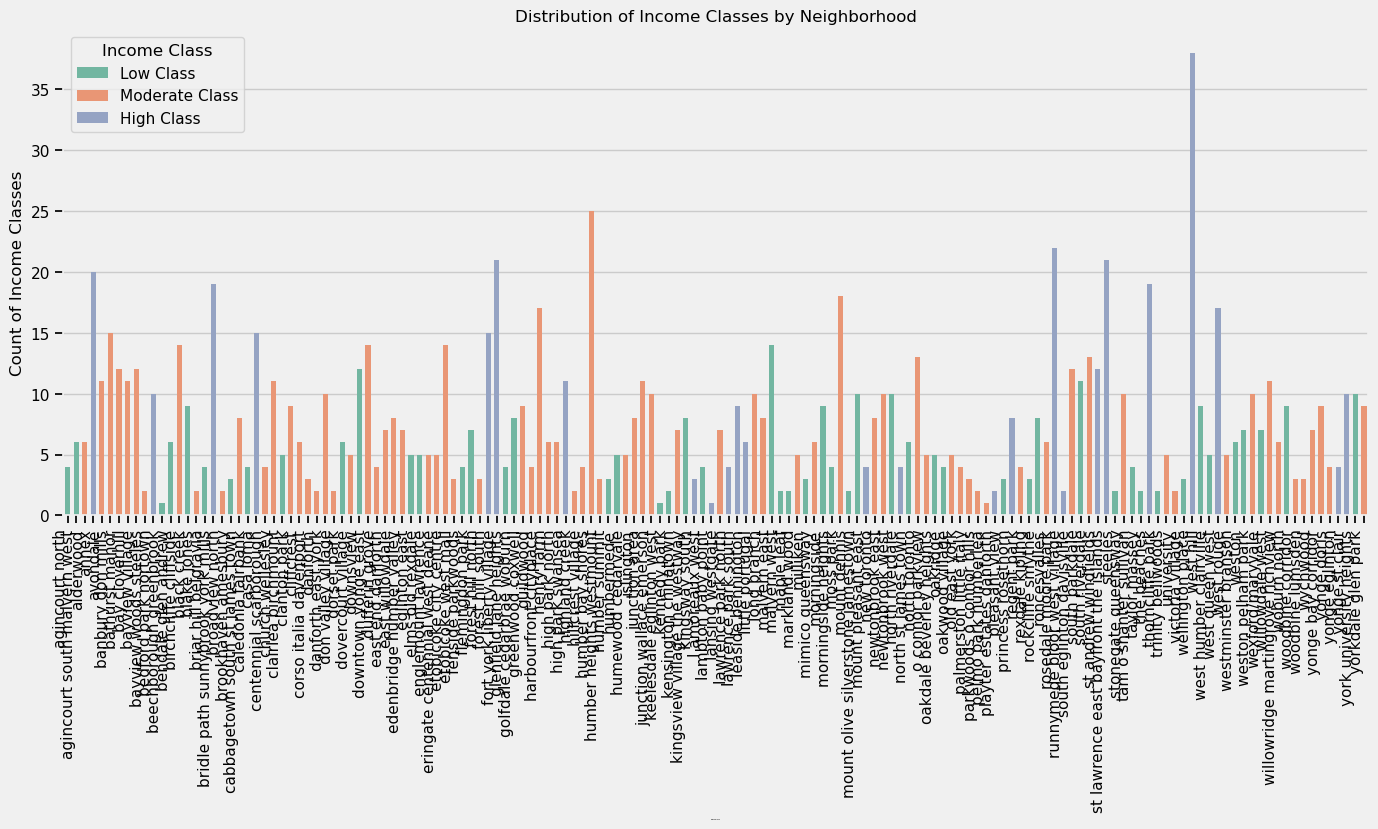

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'neighborhood' is in 'df' and 'income_class' is the income category column
plt.figure(figsize=(15, 6))
sns.countplot(data=final_df, x='neighbourhood', hue='Income_Class', palette='Set2',width=0.6)

plt.xlabel('Neighborhood',fontsize=0.001)
plt.ylabel('Count of Income Classes')
plt.title('Distribution of Income Classes by Neighborhood')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Income Class')
plt.show()


In [138]:
import plotly.express as px

# Create a treemap of neighborhoods with income class as categories
fig = px.treemap(final_df, 
                 path=['neighbourhood', 'Income_Class'], 
                 title="Treemap of Income Classes by Neighborhood",
                 color='Income_Class', 
                 color_discrete_map={'Low': 'lightcoral', 'Middle': 'lightblue', 'High': 'lightgreen'})

fig.show()


In [139]:
import plotly.express as px

# Create a treemap of neighborhoods with income class as categories
fig = px.treemap(final_df, 
                 path=['neighbourhood', 'Crime_Class'],
                 title="Treemap of Crime Classes by Neighborhood",
                 color='Crime_Class', 
                 color_discrete_map={'Low': 'lightcoral', 'Middle': 'lightblue', 'High': 'red'})

fig.show()


In [140]:
#grouping the data, Neighbourhood wise
df=final_df.copy()
grouped_df = df.groupby(['neighbourhood', 'Income_Class', 'Crime_Class']).size().reset_index(name='count')
(grouped_df)


neighbourhood    Income_Class     Crime_Class  count
0                 agincourt north       Low Class     Minor Crime      4
1    agincourt south malvern west       Low Class     Minor Crime      6
2                       alderwood  Moderate Class     Minor Crime      6
3                           annex      High Class  Moderate Crime     20
4                        avondale  Moderate Class     Minor Crime     11
..                            ...             ...             ...    ...
147                   yonge doris  Moderate Class  Moderate Crime      4
148                yonge eglinton      High Class  Moderate Crime      4
149                yonge st clair      High Class  Moderate Crime     10
150       york university heights       Low Class    Severe Crime     10
151            yorkdale glen park  Moderate Class    Severe Crime      9

[152 rows x 4 columns]

In [141]:
unique_counts = grouped_df['Crime_Class'].value_counts()
print(unique_counts)


Crime_Class
Moderate Crime    74
Severe Crime      43
Minor Crime       35
Name: count, dtype: int64


In [142]:
import plotly.express as px

# Create a treemap of neighborhoods with income class as categories
fig = px.treemap(grouped_df, 
                 path=['neighbourhood', 'Income_Class'], 
                 title="Treemap of Income Classes by Neighborhood",
                 color='Income_Class', 
                 color_discrete_map={'Low': 'lightcoral', 'Middle': 'lightblue', 'High': 'red'})

fig.show()


In [143]:
import plotly.express as px

# Create a treemap of neighborhoods with income class as categories
fig = px.treemap(grouped_df, 
                 path=['neighbourhood', 'Crime_Class'], 
                 title="Treemap of Crime Classes by Neighborhood",
                 color='Crime_Class', 
                 color_discrete_map={'Low': 'lightcoral', 'Middle': 'lightblue', 'High': 'red'})

fig.show()


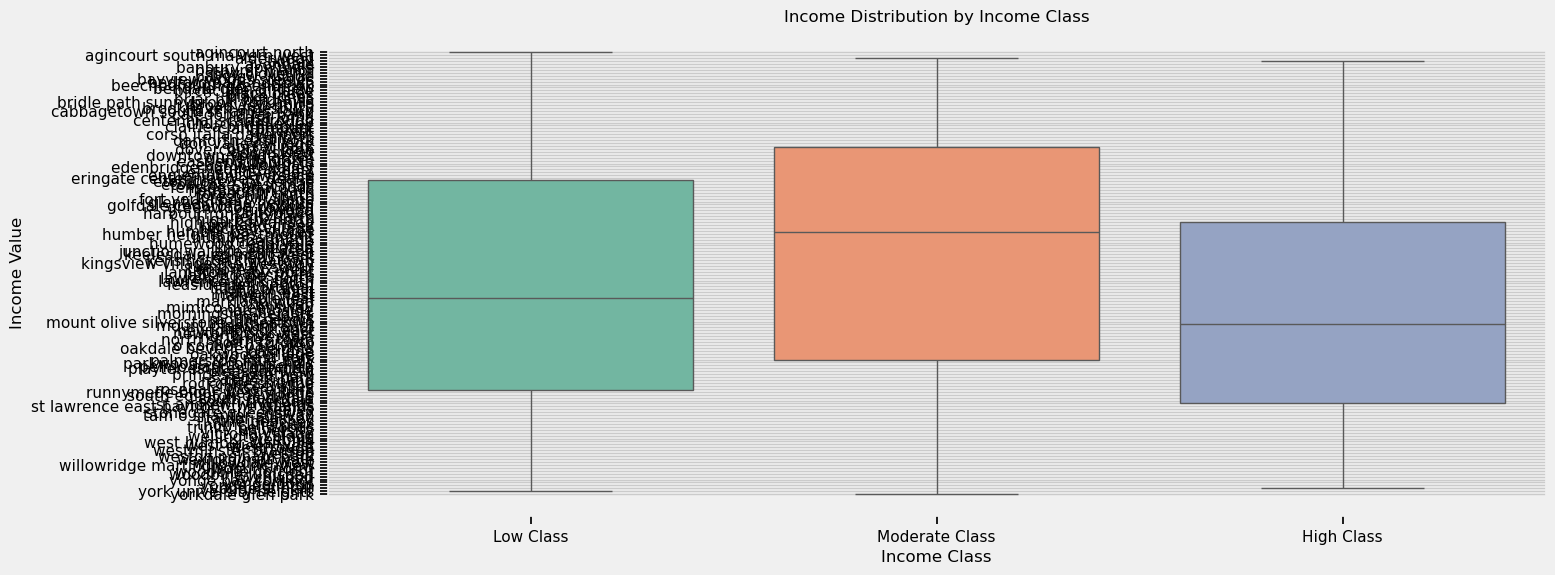

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `final_df` has 'neighbourhood' and 'Class' columns, and the income column is called 'income_value'

plt.figure(figsize=(14, 6))

# Box plot showing income distribution by income class (hue by income class)
sns.boxplot(data=grouped_df, x='Income_Class', y='neighbourhood', palette='Set2')

# Add labels and title
plt.xlabel('Income Class')
plt.ylabel('Income Value')
plt.title('Income Distribution by Income Class')
plt.xticks(rotation=0)
plt.show()


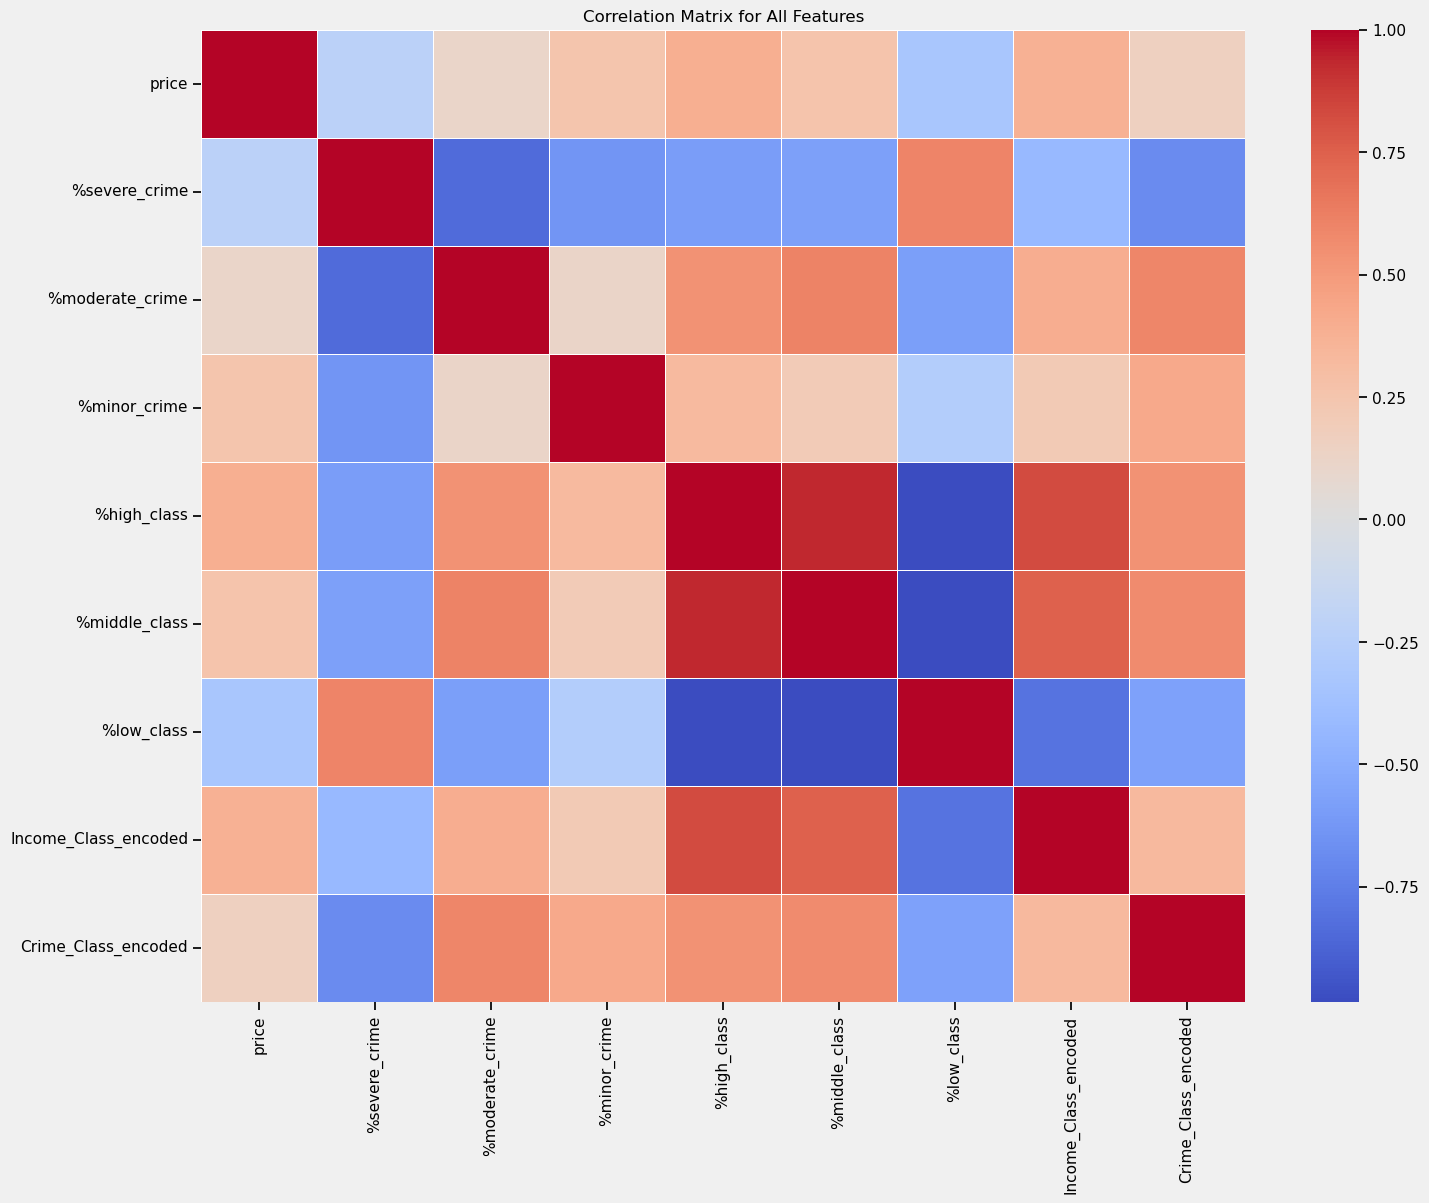

In [145]:
# Prepare the dataset: Encode categorical features
# Compute correlations of categorical columns with Price using mean encoding
categorical_columns = final_df.select_dtypes(include=['object', 'category']).columns
df= pd.concat([df_1['price'],final_df],axis=1)
for col in categorical_columns:
    # Target encode the categorical column
    target_mean = df.groupby(col)['price'].mean()
    df[f"{col}_encoded"] = df[col].map(target_mean)

# Select numerical features and encoded categorical features
numerical_features = df.select_dtypes(include=[np.number]).columns
encoded_categorical_features = [f"{col}_encoded" for col in categorical_columns]

# Combine numerical and encoded categorical features
all_features = list(numerical_features) + encoded_categorical_features
combined_df = df[all_features]
combined_df.drop(columns=['neighbourhood_encoded'], inplace=True)
# Compute the correlation matrix
full_correlation_matrix = combined_df.corr()
df2=pd.DataFrame(full_correlation_matrix)
# Print the full correlation matrix
(full_correlation_matrix)
# Compute the 3x3 correlation matrix
small_correlation_matrix = combined_df.corr().iloc[:9, :9]
# Plot the correlation heatmap
plt.figure(figsize=(15, 12))  # Adjust size as needed
sns.heatmap(small_correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix for All Features')
plt.show()


In [146]:
small_correlation_matrix['price']

price                   1.000000
%severe_crime          -0.223230
%moderate_crime         0.108725
%minor_crime            0.253628
%high_class             0.391739
%middle_class           0.261357
%low_class             -0.328135
Income_Class_encoded    0.378566
Crime_Class_encoded     0.156073
Name: price, dtype: float64

In [147]:
df

price                 neighbourhood  %severe_crime  %moderate_crime  \
0      848800               agincourt north      31.510241        32.883187   
1      998000               agincourt north      31.510241        32.883187   
2      898000               agincourt north      31.510241        32.883187   
3      560000               agincourt north      31.510241        32.883187   
4     1199000  agincourt south malvern west      44.411547        34.418949   
...       ...                           ...            ...              ...   
1128  1625000            yorkdale glen park      55.865922        23.346758   
1129  2688000            yorkdale glen park      55.865922        23.346758   
1130  3299000            yorkdale glen park      55.865922        23.346758   
1131  1800000            yorkdale glen park      55.865922        23.346758   
1132   979900            yorkdale glen park      55.865922        23.346758   

      %minor_crime  %high_class  %middle_class  %low_class    Income_Class  \
0        35.606572     4.457410      18.576429   76.966161       Low Class   
1        35.606572     4.457410      18.576429   76.966161       Low Class   
2        35.606572     4.457410      18.576429   76.966161       Low Class   
3        35.606572     4.457410      18.576429   76.966161       Low Class   
4        21.169504     5.665872      22.478157   71.855970       Low Class   
...            ...          ...            ...         ...             ...   
1128     20.787320     8.291276      26.856525   64.852199  Moderate Class   
1129     20.787320     8.291276      26.856525   64.852199  Moderate Class   
1130     20.787320     8.291276      26.856525   64.852199  Moderate Class   
1131     20.787320     8.291276      26.856525   64.852199  Moderate Class   
1132     20.787320     8.291276      26.856525   64.852199  Moderate Class   

       Crime_Class  neighbourhood_encoded  Income_Class_encoded  \
0      Minor Crime           8.262000e+05          8.989987e+05   
1      Minor Crime           8.262000e+05          8.989987e+05   
2      Minor Crime           8.262000e+05          8.989987e+05   
3      Minor Crime           8.262000e+05          8.989987e+05   
4      Minor Crime           8.201952e+05          8.989987e+05   
...            ...                    ...                   ...   
1128  Severe Crime           1.698411e+06          1.389993e+06   
1129  Severe Crime           1.698411e+06          1.389993e+06   
1130  Severe Crime           1.698411e+06          1.389993e+06   
1131  Severe Crime           1.698411e+06          1.389993e+06   
1132  Severe Crime           1.698411e+06          1.389993e+06   

      Crime_Class_encoded  
0            2.371959e+06  
1            2.371959e+06  
2            2.371959e+06  
3            2.371959e+06  
4            2.371959e+06  
...                   ...  
1128         9.165281e+05  
1129         9.165281e+05  
1130         9.165281e+05  
1131         9.165281e+05  
1132         9.165281e+05  

[1133 rows x 13 columns]

In [148]:
from folium import Choropleth

neighbourhoods = gpd.read_file('Neighbourhoods - 4326.geojson') 


plot_geography = neighbourhoods.to_crs(epsg=4326)[['AREA_NAME', 'geometry']]
plot_geography = plot_geography.set_index('AREA_NAME')
plot_geography.head()

# Step 3: Merge these columns into hos_t based on the "Neighbourhood" index

income_c=grouped_df['Income_Class']
neighbourhoods = neighbourhoods.merge(income_c, how='left', left_index=True, right_index=True)

plot_data=neighbourhoods[['AREA_NAME','Income_Class']]
plot_data=plot_data.dropna()

plot_data['Income_Class'] = plot_data['Income_Class'].astype('category').cat.codes

# Optional: Save the mapping for reference
income_class_mapping = dict(enumerate(neighbourhoods['Income_Class'].astype('category').cat.categories))

# Create a base map
map_1 = folium.Map(location=[43.6426, -79.3871], 
                 tiles='cartodbpositron',
                 zoom_start=10)

# Add a choropleth map to the base map
Choropleth(geo_data=plot_geography.__geo_interface__, 
           columns=['AREA_NAME', 'Income_Class'],
           data=plot_data, 
           key_on='feature.id', 
           fill_color='YlOrRd', 
           legend_name='Income_Class'
          ).add_to(map_1)

# Print the mapping
for code, label in income_class_mapping.items():
    print(f"Code {code} corresponds to {label}")

# Display the map
map_1

#neighbourhoods

Code 0 corresponds to High Class
Code 1 corresponds to Low Class
Code 2 corresponds to Moderate Class


In [149]:
from folium import Choropleth

neighbourhoods = gpd.read_file('Neighbourhoods - 4326.geojson') 


plot_geography = neighbourhoods.to_crs(epsg=4326)[['AREA_NAME', 'geometry']]
plot_geography = plot_geography.set_index('AREA_NAME')
plot_geography.head()
crime_c=grouped_df['Crime_Class']
neighbourhoods = neighbourhoods.merge(crime_c, how='left', left_index=True, right_index=True)

plot_data=neighbourhoods[['AREA_NAME','Crime_Class']]
plot_data=plot_data.dropna()
plot_data['Crime_Class'] = plot_data['Crime_Class'].astype('category').cat.codes
# Optional: Save the mapping for reference
income_class_mapping = dict(enumerate(neighbourhoods['Crime_Class'].astype('category').cat.categories))

# Create a base map
map_1 = folium.Map(location=[43.6426, -79.3871], 
                 tiles='cartodbpositron',
                 zoom_start=10)

# Add a choropleth map to the base map
Choropleth(geo_data=plot_geography.__geo_interface__, 
           columns=['AREA_NAME', 'Crime_Class'],
           data=plot_data, 
           key_on='feature.id', 
           fill_color='YlOrRd', 
           legend_name='Crime_Class'
          ).add_to(map_1)
# Print the mapping
for code, label in income_class_mapping.items():
    print(f"Code {code} corresponds to {label}")

# Display the map
map_1



Code 0 corresponds to Minor Crime
Code 1 corresponds to Moderate Crime
Code 2 corresponds to Severe Crime


In [150]:
df

price                 neighbourhood  %severe_crime  %moderate_crime  \
0      848800               agincourt north      31.510241        32.883187   
1      998000               agincourt north      31.510241        32.883187   
2      898000               agincourt north      31.510241        32.883187   
3      560000               agincourt north      31.510241        32.883187   
4     1199000  agincourt south malvern west      44.411547        34.418949   
...       ...                           ...            ...              ...   
1128  1625000            yorkdale glen park      55.865922        23.346758   
1129  2688000            yorkdale glen park      55.865922        23.346758   
1130  3299000            yorkdale glen park      55.865922        23.346758   
1131  1800000            yorkdale glen park      55.865922        23.346758   
1132   979900            yorkdale glen park      55.865922        23.346758   

      %minor_crime  %high_class  %middle_class  %low_class    Income_Class  \
0        35.606572     4.457410      18.576429   76.966161       Low Class   
1        35.606572     4.457410      18.576429   76.966161       Low Class   
2        35.606572     4.457410      18.576429   76.966161       Low Class   
3        35.606572     4.457410      18.576429   76.966161       Low Class   
4        21.169504     5.665872      22.478157   71.855970       Low Class   
...            ...          ...            ...         ...             ...   
1128     20.787320     8.291276      26.856525   64.852199  Moderate Class   
1129     20.787320     8.291276      26.856525   64.852199  Moderate Class   
1130     20.787320     8.291276      26.856525   64.852199  Moderate Class   
1131     20.787320     8.291276      26.856525   64.852199  Moderate Class   
1132     20.787320     8.291276      26.856525   64.852199  Moderate Class   

       Crime_Class  neighbourhood_encoded  Income_Class_encoded  \
0      Minor Crime           8.262000e+05          8.989987e+05   
1      Minor Crime           8.262000e+05          8.989987e+05   
2      Minor Crime           8.262000e+05          8.989987e+05   
3      Minor Crime           8.262000e+05          8.989987e+05   
4      Minor Crime           8.201952e+05          8.989987e+05   
...            ...                    ...                   ...   
1128  Severe Crime           1.698411e+06          1.389993e+06   
1129  Severe Crime           1.698411e+06          1.389993e+06   
1130  Severe Crime           1.698411e+06          1.389993e+06   
1131  Severe Crime           1.698411e+06          1.389993e+06   
1132  Severe Crime           1.698411e+06          1.389993e+06   

      Crime_Class_encoded  
0            2.371959e+06  
1            2.371959e+06  
2            2.371959e+06  
3            2.371959e+06  
4            2.371959e+06  
...                   ...  
1128         9.165281e+05  
1129         9.165281e+05  
1130         9.165281e+05  
1131         9.165281e+05  
1132         9.165281e+05  

[1133 rows x 13 columns]

## getting to know the importance of features

In [154]:
from sklearn.model_selection import train_test_split

# Assuming `df` is your DataFrame
# First, split the data into 70% and 30%
df_p = df.loc[:, ['price', 'Income_Class_encoded', 'Crime_Class_encoded']]

train, test = train_test_split(df_p, test_size=0.15, random_state=42)

# Check the sizes of each split
print(f"Train size: {len(train)} ({len(train) / len(df):.2%})")

print(f"Test size: {len(test)} ({len(test) / len(df):.2%})")
train

Train size: 963 (85.00%)
Test size: 170 (15.00%)


price  Income_Class_encoded  Crime_Class_encoded
882     618000          4.131810e+06         2.206077e+06
362   16950000          4.131810e+06         2.206077e+06
534    1998000          1.389993e+06         2.206077e+06
78      698000          1.389993e+06         2.206077e+06
243    1349000          1.389993e+06         2.206077e+06
...        ...                   ...                  ...
1044    799000          8.989987e+05         2.371959e+06
1095    850000          1.389993e+06         2.206077e+06
1130   3299000          1.389993e+06         9.165281e+05
860     849999          1.389993e+06         2.206077e+06
1126    499900          1.389993e+06         9.165281e+05

[963 rows x 3 columns]

In [155]:
from sklearn.model_selection import KFold

train_cleaned = train.dropna()
y = train_cleaned['price']
train_cleaned.drop(columns=['price'], inplace=True)
X = (train_cleaned)

# Labels


# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Loop through folds
for fold, (train_idx, val_idx) in enumerate(kf.split(X, y)):
    print(f"Fold {fold+1}")
    
    # Split into train and validation sets
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    print(f"X_train shape: {X_train.shape}, X_val shape: {X_val.shape}")
    print(f"y_train shape: {y_train.shape}, y_val shape: {y_val.shape}")
    print()


Fold 1
X_train shape: (770, 2), X_val shape: (193, 2)
y_train shape: (770,), y_val shape: (193,)

Fold 2
X_train shape: (770, 2), X_val shape: (193, 2)
y_train shape: (770,), y_val shape: (193,)

Fold 3
X_train shape: (770, 2), X_val shape: (193, 2)
y_train shape: (770,), y_val shape: (193,)

Fold 4
X_train shape: (771, 2), X_val shape: (192, 2)
y_train shape: (771,), y_val shape: (192,)

Fold 5
X_train shape: (771, 2), X_val shape: (192, 2)
y_train shape: (771,), y_val shape: (192,)



In [156]:
# Instantiate a classifier model
model = RandomForestRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_val)

print(r2_score(y_val, y_pred))

0.09208122516494377


In [65]:
# from sklearn.model_selection import cross_val_score

# # Perform cross-validation on the training data
# cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# # Calculate mean MSE
# mean_cv_mse = -cv_scores.mean()
# print(f"Mean Cross-Validated MSE: {mean_cv_mse}")


Top Features Based on Importance:
                Feature  Importance
0  Income_Class_encoded    0.832701
1   Crime_Class_encoded    0.167299


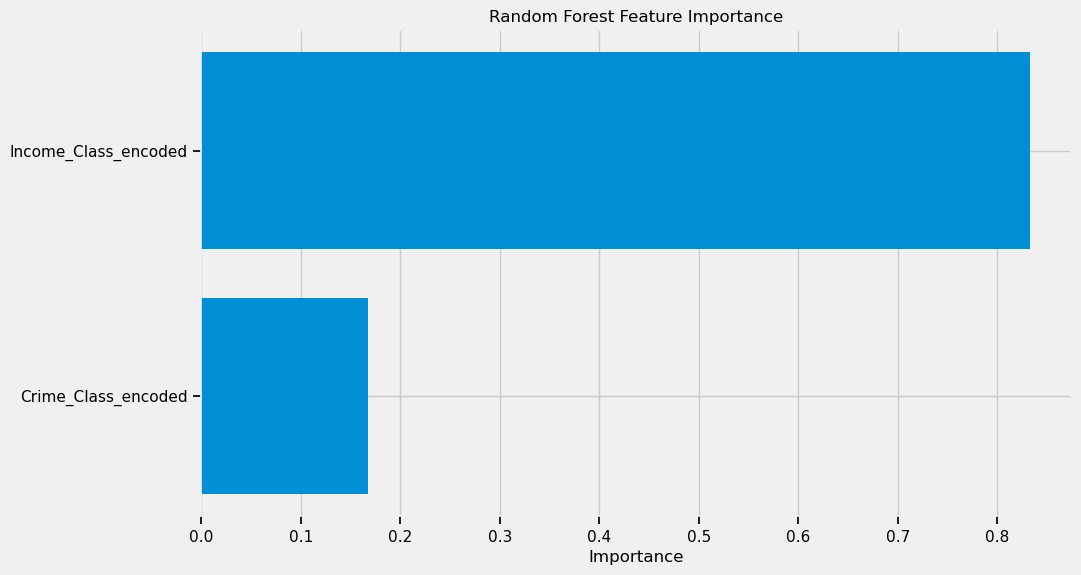

In [158]:
# Get feature importances
importances = model.feature_importances_

# Create a DataFrame to display feature importances along with their feature names
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,  
    'Importance': importances
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the top features
print("Top Features Based on Importance:")
print(feature_importance_df.head())

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()  
plt.show()


In [159]:
## income more affecting then crime